<a href="https://colab.research.google.com/github/thisant/Dados-Criminais/blob/main/Dados_Criminais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn import metrics
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dataset_criminais = pd.read_excel("estado.xlsx")
dataset_criminais_dummies = pd.get_dummies(dataset_criminais['Tipo Crime'])

In [ ]:
dataset_criminais

,UF,Tipo Crime,Ano,Mês,Ocorrências,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio
0,Acre,Estupro,2015,janeiro,6,1,0,0,0,0,0,0,0,0
1,Acre,Furto de veículo,2015,janeiro,0,0,1,0,0,0,0,0,0,0
2,Acre,Homicídio doloso,2015,janeiro,13,0,0,1,0,0,0,0,0,0
3,Acre,Lesão corporal seguida de morte,2015,janeiro,0,0,0,0,1,0,0,0,0,0
4,Acre,Roubo a instituição financeira,2015,janeiro,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17543,Tocantins,Furto de veículo,2021,janeiro,101,0,1,0,0,0,0,0,0,0
17544,Tocantins,Homicídio doloso,2021,janeiro,35,0,0,1,0,0,0,0,0,0
17545,Tocantins,Roubo de veículo,2021,janeiro,55,0,0,0,0,0,0,1,0,0
17546,Tocantins,Roubo seguido de morte (latrocínio),2021,janeiro,1,0,0,0,0,0,0,0,1,0


In [ ]:
dataset_criminais_dummies

,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
17543,0,1,0,0,0,0,0,0,0
17544,0,0,1,0,0,0,0,0,0
17545,0,0,0,0,0,0,1,0,0
17546,0,0,0,0,0,0,0,1,0


In [ ]:
dataset_criminais.describe()

,Ano,Ocorrências
count,17548.000000,17548.000000
mean,2017.543538,215.512138
std,1.738172,703.910352
min,2015.000000,0.000000
25%,2016.000000,3.000000
50%,2018.000000,34.000000
75%,2019.000000,174.000000
max,2021.000000,10518.000000


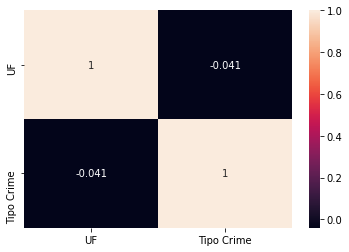

In [ ]:
dataset_criminais_corr = dataset_criminais[['UF','Tipo Crime','Ano','Mês','Ocorrências']].corr()
sns.heatmap(dataset_criminais_corr, xticklabels=['UF','Tipo Crime'], yticklabels=['UF','Tipo Crime'], annot=True)

In [ ]:
dataframe_criminal = pd.DataFrame(dataset_criminais_dummies)
dataframe_criminal

,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
17543,0,1,0,0,0,0,0,0,0
17544,0,0,1,0,0,0,0,0,0
17545,0,0,0,0,0,0,1,0,0
17546,0,0,0,0,0,0,0,1,0


In [ ]:
dataframe_dist = pd.DataFrame(
    squareform(pdist(dataframe_criminal, metric='euclidean')),
    columns = dataset_criminais.UF,
    index = dataset_criminais.UF
)
dataframe_dist

UF,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,...,Roraima,Roraima,Roraima,Roraima,Roraima,Roraima,Roraima,Santa Catarina,Santa Catarina,Santa Catarina,Santa Catarina,Santa Catarina,Santa Catarina,Santa Catarina,Santa Catarina,Santa Catarina,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo,Sergipe,Sergipe,Sergipe,Sergipe,Sergipe,Sergipe,Sergipe,Sergipe,Sergipe,Tocantins,Tocantins,Tocantins,Tocantins,Tocantins,Tocantins
UF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acre,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214
Acre,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214
Acre,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,...,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214
Acre,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,...,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
Acre,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,...,1.414214,1.

In [ ]:
dataset_criminais = pd.concat([dataset_criminais,dataset_criminais_dummies],axis=1)

In [ ]:
Estado = dataset_criminais.drop(columns=['UF'])
Crime = dataset_criminais.drop(columns=['Tipo Crime'])
Mes = dataset_criminais.drop(columns=['Mês'])
Ocorrencia = dataset_criminais.drop(columns=['Ocorrências'])

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataframe_dist)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters = kmeans.labels_.tolist()

clusters_dict = { 'Estado': list(dataset_criminais.UF), 'Mês': dataset_criminais.Mês,'Ano': dataset_criminais.Ano,'Ocorrências': dataset_criminais.Ocorrências, 'cluster': clusters}
dataframe_clusters = pd.DataFrame(clusters_dict, columns = ['Estado', 'Mês','Ano','Ocorrências','cluster'])
dataframe_clusters.head()

,Estado,Mês,Ano,Ocorrências,cluster
0,Acre,janeiro,2015,6,3
1,Acre,janeiro,2015,0,0
2,Acre,janeiro,2015,13,2
3,Acre,janeiro,2015,0,0
4,Acre,janeiro,2015,0,0


In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=dataframe_clusters['Estado'], 
    z = dataframe_clusters['cluster'].astype(float),
    locationmode = 'country names', 
    colorscale = 'blugrn',
    colorbar_title = "Cluster",
))
fig.update_layout(
    title_text = 'Clusterização de Regiões - KMeans',
    geo_scope='south america', 
)
fig.show()